# Stock Market Analysis Prediction using LSTM

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

from datetime import datetime

## 데이터
- Pandas DataReader API 사용
- 지금 시점으로부터 1년전부터 지금까지 1년 데이터 수집
- IT기업 (애플, 마이크로소프트, 구글, 아마존) 수집

In [2]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']  # 분석할 기업

# 주식 시점 입력(시작/끝)
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


# 데이터 불러오기
# DataReader API : 증권사 api보다 yahoo finance 데이터 이용
for stock in tech_list:   
    globals()[stock] = DataReader(stock, 'yahoo', start, end) 

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-02-01,3350.26001,3235.030029,3242.360107,3342.879883,4160200.0,3342.879883,AMAZON
2021-02-02,3427.73999,3361.129883,3380.000000,3380.000000,7098600.0,3380.000000,AMAZON
2021-02-03,3434.00000,3308.620117,3425.010010,3312.530029,7088800.0,3312.530029,AMAZON
2021-02-04,3347.00000,3277.750000,3330.000000,3331.000000,3670700.0,3331.000000,AMAZON
2021-02-05,3377.00000,3302.709961,3319.000000,3352.149902,3613600.0,3352.149902,AMAZON


In [4]:
df['company_name'].unique()

array(['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'], dtype=object)

In [5]:
df.groupby(['company_name'])['High'].count()  # 각 회사별로 251개씩 df에 존재함

company_name
AMAZON       251
APPLE        251
GOOGLE       251
MICROSOFT    251
Name: High, dtype: int64

## 수정 종가, 거래량 시각화

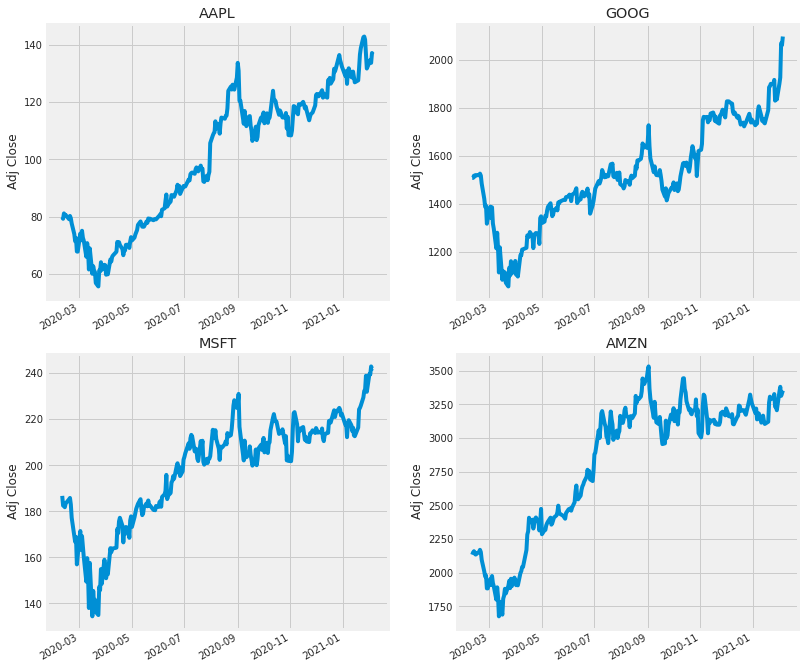

In [6]:
# 수정 종가 변화
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

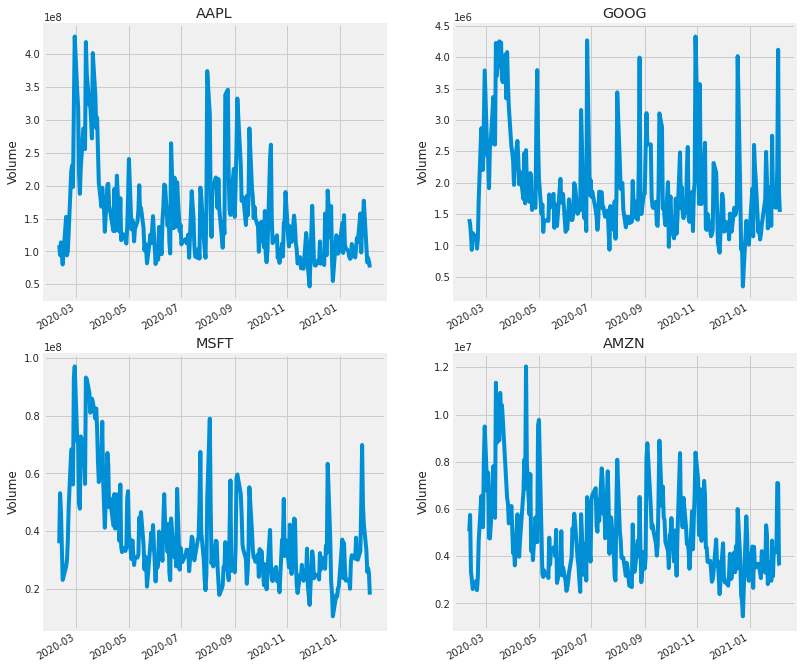

In [7]:
# 총 거래량 변화
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## 이동평균 계산
- 일정한 부분집합의 평균값 계산으로 값들의 **전체적인 흐름**을 파악할 수 있게 해줌
- 수의 집합에서 특정 크기의 부분집합을 연속적으로 이동하여 산출한 평균
- **부분집합의 크기**를 뭘로 할지는 하이퍼파라미터!

In [8]:
company_list = [AAPL, GOOG, MSFT, AMZN]

In [9]:
display(AAPL.tail(2))
display(GOOG.tail(2))

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-02-04,137.399994,134.589996,136.300003,137.389999,84183100.0,137.184998,APPLE
2021-02-05,137.419998,135.860001,137.350006,136.759995,75524000.0,136.759995,APPLE


,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-02-04,2078.550049,2042.589966,2068.889893,2062.370117,1852300,2062.370117,GOOGLE
2021-02-05,2102.510010,2059.330078,2070.000000,2098.000000,1533900,2098.000000,GOOGLE


In [10]:
# rolling 사용 > 수정종가 이동평균 시각화

ma_day = [10, 20, 50] # 부분집합 10일, 20일, 50일로 확장

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

이동평균이니까 앞부분이 NaN이다!
fillna 해주자!

In [11]:
AAPL.head(15)

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2020-02-10,80.387497,78.462502,78.544998,80.387497,109348800.0,79.769165,APPLE,NaN,NaN,NaN
2020-02-11,80.974998,79.677498,80.900002,79.902496,94323200.0,79.287888,APPLE,NaN,NaN,NaN
2020-02-12,81.805000,80.367500,80.367500,81.800003,113730400.0,81.170799,APPLE,NaN,NaN,NaN
2020-02-13,81.555000,80.837502,81.047501,81.217499,94747600.0,80.592773,APPLE,NaN,NaN,NaN
2020-02-14,81.495003,80.712502,81.184998,81.237503,80113600.0,80.612625,APPLE,NaN,NaN,NaN
2020-02-18,79.937500,78.652496,78.839996,79.750000,152531200.0,79.136566,APPLE,NaN,NaN,NaN
2020-02-19,81.142502,80.000000,80.000000,80.904999,93984000.0,80.282684,APPLE,NaN,NaN,NaN
2020-02-20,81.162498,79.552498,80.657501,80.074997,100566000.0,79.459068,APPLE,NaN,NaN,NaN
2020-02-21,80.112503,77.625000,79.654999,78.262497,129554000.0,77.660507,APPLE,NaN,NaN,NaN


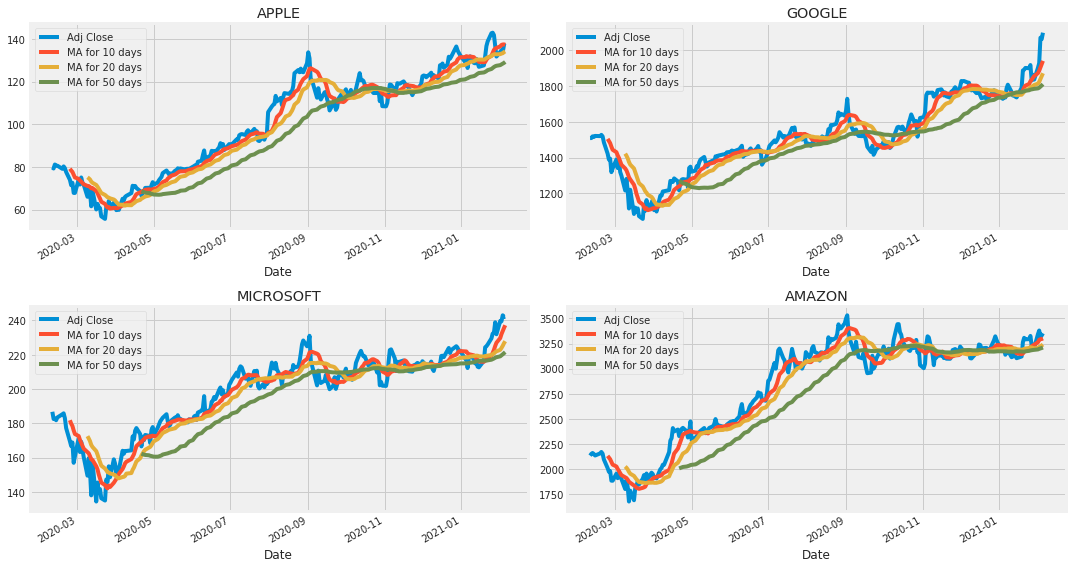

In [12]:
# 수정종가 이동평균 시각화
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## 하루 평균 수익률 계산
- pct_change() 이용

In [13]:
# 수정 종가 수익률 계산
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

In [14]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2020-02-10,80.387497,78.462502,78.544998,80.387497,109348800.0,79.769165,APPLE,NaN,NaN,NaN,NaN
2020-02-11,80.974998,79.677498,80.900002,79.902496,94323200.0,79.287888,APPLE,NaN,NaN,NaN,-0.006033
2020-02-12,81.805000,80.367500,80.367500,81.800003,113730400.0,81.170799,APPLE,NaN,NaN,NaN,0.023748
2020-02-13,81.555000,80.837502,81.047501,81.217499,94747600.0,80.592773,APPLE,NaN,NaN,NaN,-0.007121
2020-02-14,81.495003,80.712502,81.184998,81.237503,80113600.0,80.612625,APPLE,NaN,NaN,NaN,0.000246


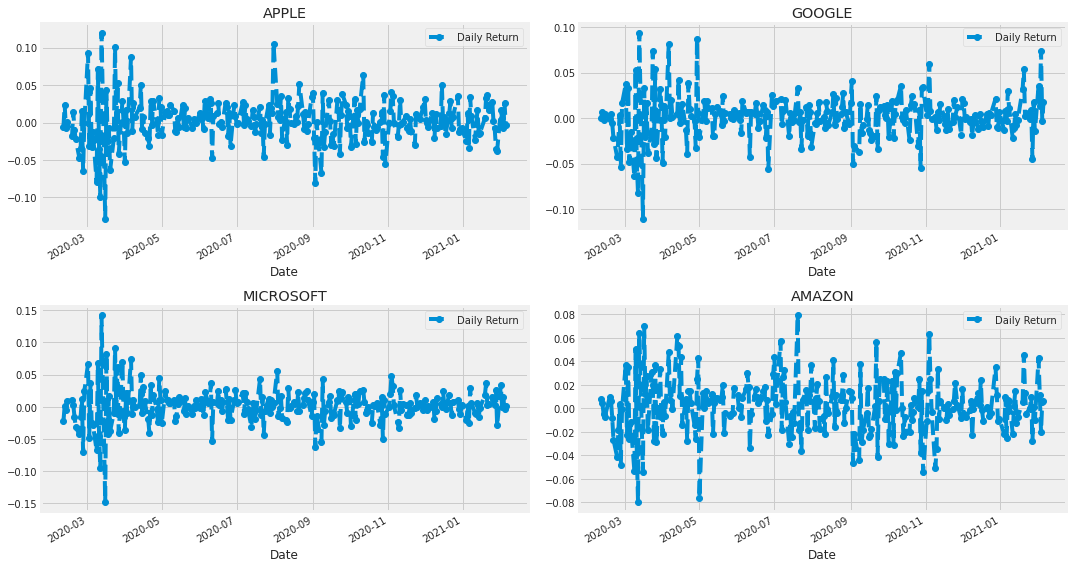

In [15]:
# 수익률 변동 그래프
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

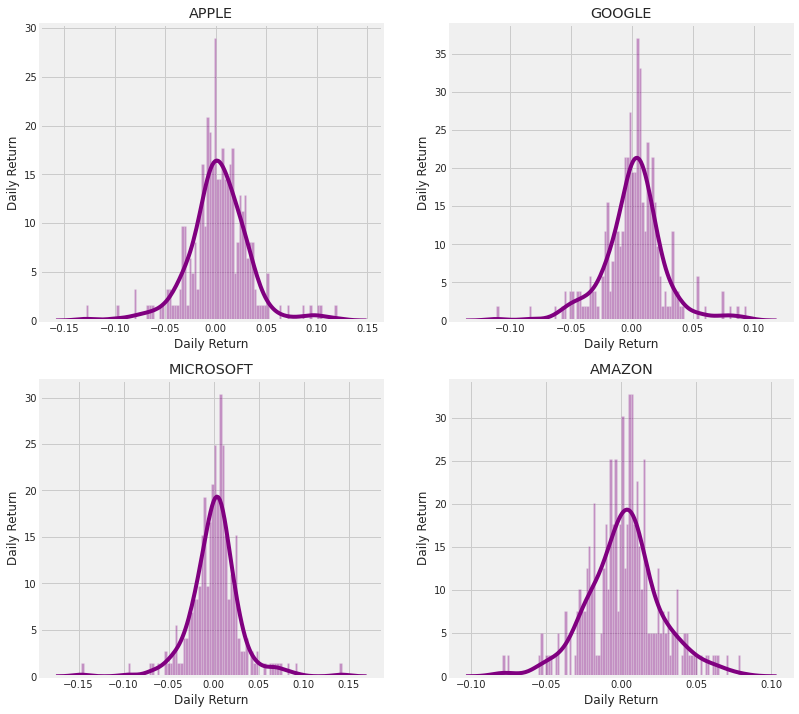

In [16]:
# 평균 수익률 히스토그램
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

## 수익률, 종가의 기업별 상관관계


In [17]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-10,79.769165,1508.680054,186.721939,2133.909912
2020-02-11,79.287888,1508.790039,182.506607,2150.800049
2020-02-12,81.170799,1518.270020,182.773773,2160.000000
2020-02-13,80.592773,1514.660034,181.784271,2149.870117
2020-02-14,80.612625,1520.739990,183.407059,2134.870117


In [18]:
# 종가의 수익률 테이블 : pct_change()로 구함
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-10,NaN,NaN,NaN,NaN
2020-02-11,-0.006033,0.000073,-0.022575,0.007915
2020-02-12,0.023748,0.006283,0.001464,0.004277
2020-02-13,-0.007121,-0.002378,-0.005414,-0.004690
2020-02-14,0.000246,0.004014,0.008927,-0.006977


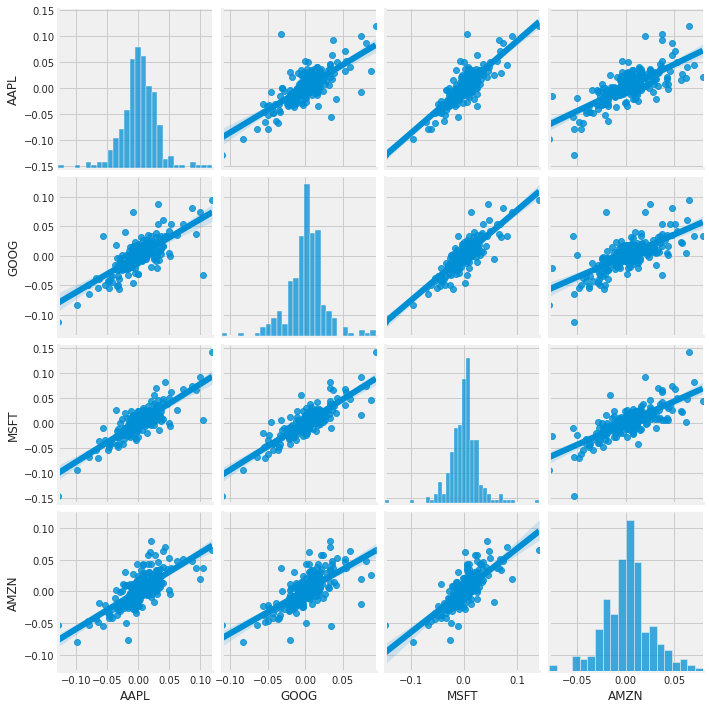

In [19]:
# 수익률에 따른 기업별 상관관계 분포
sns.pairplot(tech_rets, kind='reg')

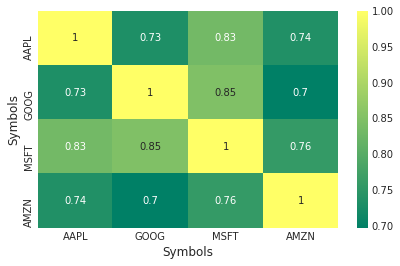

In [27]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer') # 수익률 히트맵

- 마이크로소프트와 구글의 수익률의 상관관계가 높다(0.85)
- 그 외에는 다 0.7정도로 상관관계가 그래도 IT기업이다 보니 있는 편이다. 



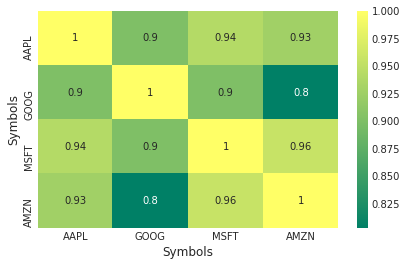

In [28]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer') # 종가 히트맵

- 수익률보다 종가의 상관관계가 전반적으로 높다. 
- 특히 마이크로소프트와 아마존의 상관관계가 매우 높다

## 위험도 정량화
- **평균 수익률과 일별 수익의 표준 편차**를 비교

In [29]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-10,NaN,NaN,NaN,NaN
2020-02-11,-0.006033,0.000073,-0.022575,0.007915
2020-02-12,0.023748,0.006283,0.001464,0.004277
2020-02-13,-0.007121,-0.002378,-0.005414,-0.004690
2020-02-14,0.000246,0.004014,0.008927,-0.006977


In [32]:
print(rets.mean(), rets.std())

Symbols
AAPL    0.002602
GOOG    0.001634
MSFT    0.001430
AMZN    0.002102
dtype: float64 Symbols
AAPL    0.029823
GOOG    0.025080
MSFT    0.027897
AMZN    0.024323
dtype: float64


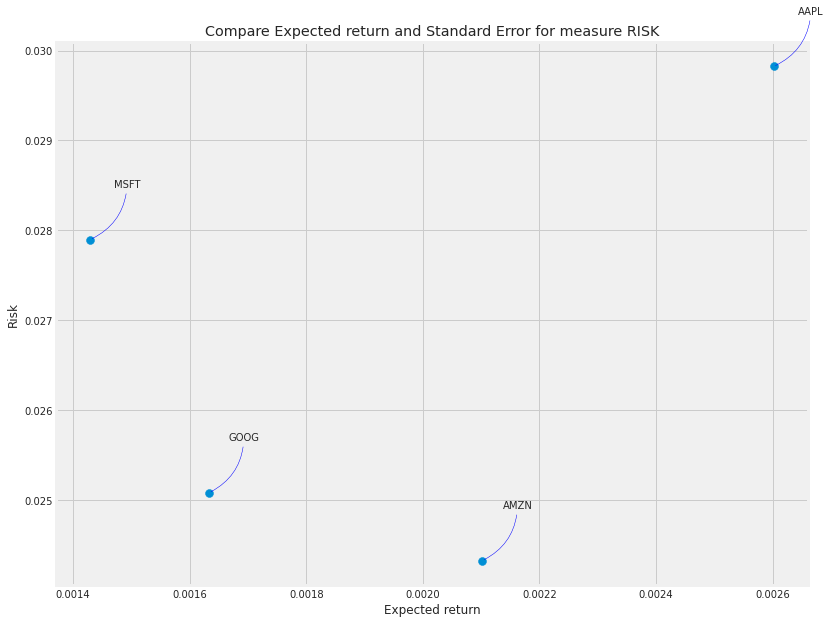

In [36]:
rets = tech_rets.dropna()  # 수익률 계산 과정에서 null 값 제거

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)  # 수익률 평균, 표준편차
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Compare Expected return and Standard Error for measure RISK')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

- **애플**이 기대수익이 높지만 위험도도 당연히 큼(표준편차가 큼)
- 아마존은 기대수익은 높지만 위험도는 낮음(표준편차가 낮음)

## 애플의 종가 예측
- 2012년 1월 1일부터 지금까지 데이터 수집
- LSTM 사용

In [43]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
display(df.head(2))
display(df.tail(2))

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-04,137.399994,134.589996,136.300003,137.389999,84183100.0,137.184998
2021-02-05,137.419998,135.860001,137.350006,136.759995,75524000.0,136.759995


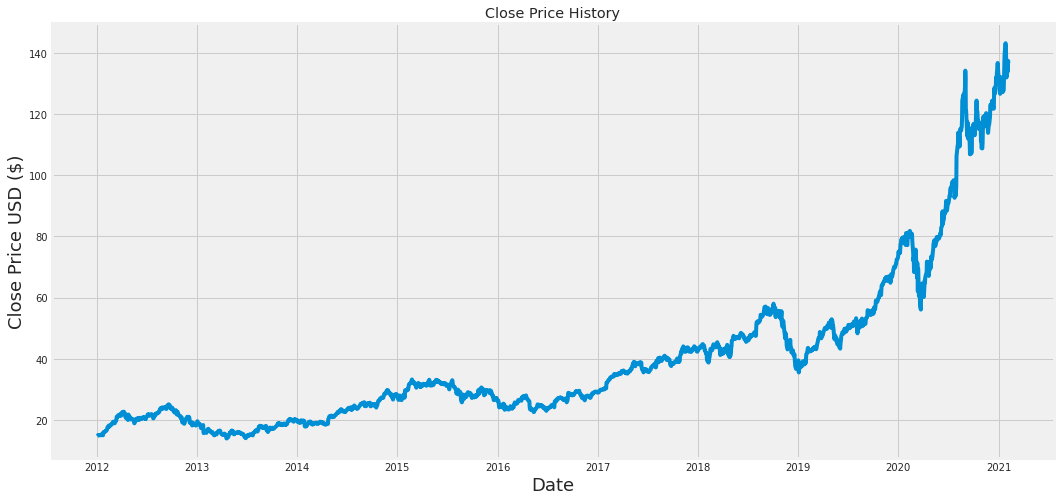

In [44]:
# 2012년부터 2021년 현재까지 종가 변화 그래프 시각화
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [47]:
data = df.filter(['Close'])
dataset = data.values
dataset.shape

(2289, 1)

In [68]:
# 스케일이 크므로 딥러닝 학습을 위한 min-max scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
scaled_data = sc.fit_transform(dataset)
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.92864467],
       [0.95534485],
       [0.95046912]])

In [53]:
train_data = sc_data[0:int(dataset.shape[0]), :] # 전체선택
train_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.92864467],
       [0.95534485],
       [0.95046912]])

- train, test split 단위 : 60일
- 60일까지를 train으로 잡고, 그 다음날을 test로 잡은 단위들을 x_train, y_train으로 각각 append해서 적재

In [65]:
dataset.shape

(2289, 1)

In [76]:
# 8/2로 train/test split
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

1832

In [77]:
# 8:2 비율로 train/test 데이터를 나눔
train_data = scaled_data[0:int(training_data_len), :]
test_data = scaled_data[training_data_len - 60: , :]

x_train = []
y_train = []
x_test = []
y_test = dataset[training_data_len:, :] # true label

# 60일 단위로 x, y 구성(60일 동안 주가를 주고 그 바로 다음날을 맞추도록 모델을 설계)
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
        
x_train, y_train = np.array(x_train), np.array(y_train)
x_test = np.array(x_test)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [78]:
print(x_train.shape, y_train.shape)

(1772, 60, 1) (1772,)


In [70]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1772/1772 [==============================] - 14s 6ms/step - loss: 4.0101e-04
Epoch 2/5
1772/1772 [==============================] - 11s 6ms/step - loss: 9.9378e-05
Epoch 3/5
1772/1772 [==============================] - 11s 6ms/step - loss: 6.7835e-05
Epoch 4/5
1772/1772 [==============================] - 12s 6ms/step - loss: 6.4592e-05
Epoch 5/5
1772/1772 [==============================] - 12s 7ms/step - loss: 6.1711e-05


In [72]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.1235442933850166

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


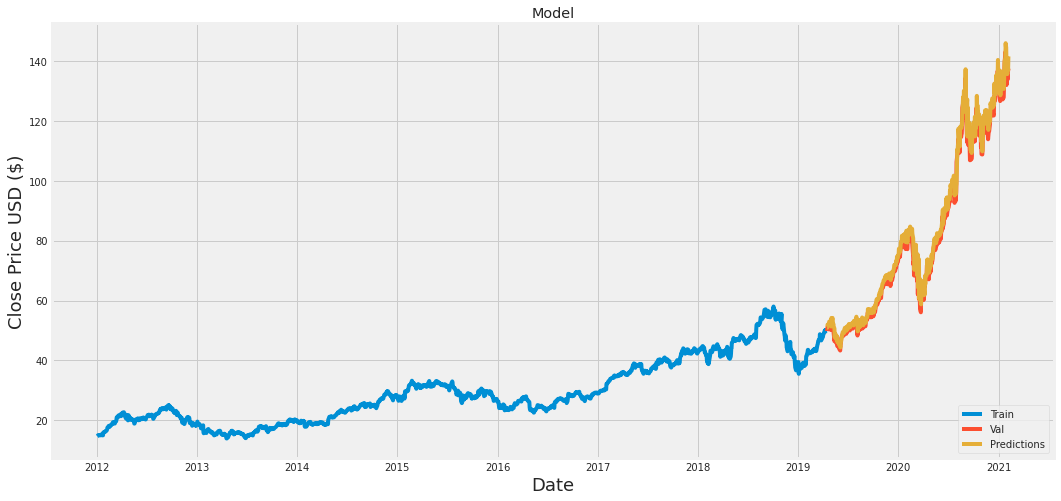

In [73]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [74]:
valid

,Close,Predictions
Date,,
2019-04-16,49.812500,50.964287
2019-04-17,50.782501,50.952312
2019-04-18,50.965000,51.983936
2019-04-22,51.132500,51.925793
2019-04-23,51.869999,52.223633
...,...,...
2021-02-01,134.139999,135.607910
2021-02-02,134.990005,139.401825
2021-02-03,133.940002,137.918198
